In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv('Titanic_train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print("Total number of passengers in the dataset: " + str(len(train.index)))

Total number of passengers in the dataset: 891


In [ ]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

In [ ]:
print(train.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [ ]:
print(train['Sex'].head())

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are many null values under 'Cabin' column.

687 out of 891 data points is a really high amount. Also there are quite a number of null values under age.

In [ ]:
print(train.sum())

PassengerId    397386.000000
Survived          342.000000
Pclass           2057.000000
Age             26461.913824
SibSp             466.000000
Parch             340.000000
Fare            28693.949300
male              577.000000
Q                  77.000000
S                 644.000000
dtype: float64


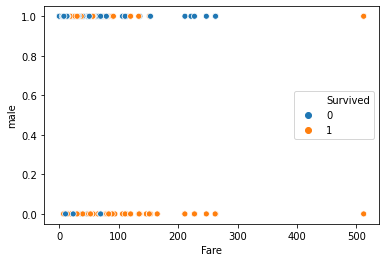

In [ ]:
sns.scatterplot(x='Fare',y='male',hue='Survived',data=train)
plt.show()

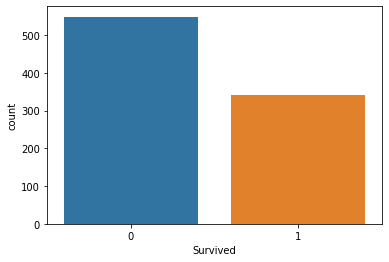

In [ ]:
sns.countplot(x='Survived', data=train);
plt.show()

We can see only one third of the total passengers survived the incident

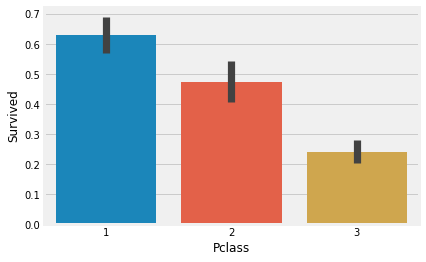

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

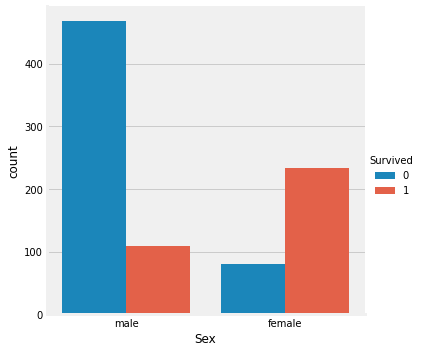

In [ ]:

sns.catplot(x ="Sex", hue ="Survived",  kind ="count", data = train)

Here, we can just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

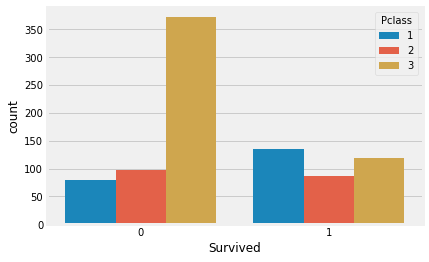

In [ ]:
sns.countplot(x="Survived", hue="Pclass", data=train)

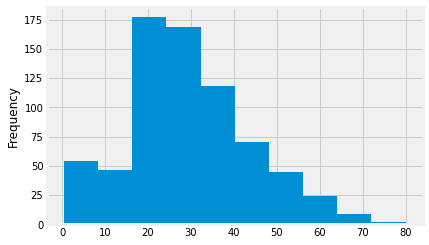

In [ ]:
train["Age"].plot.hist()

We can see average population of passengers on the titanic are young to middle age group.

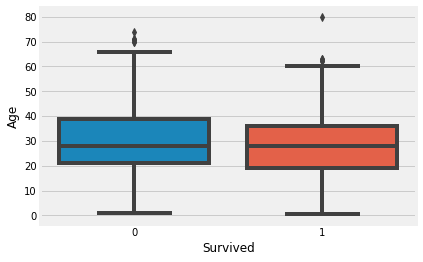

In [ ]:
sns.boxplot(x="Survived", y="Age", data=train)

We can see that younger people tend to have a slightly higher survival rate than the older counterpart.

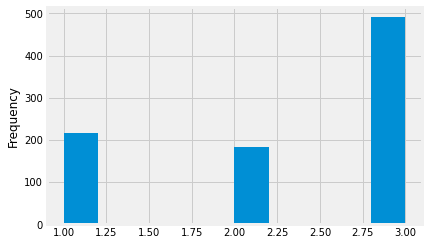

In [ ]:
train["Pclass"].plot.hist()

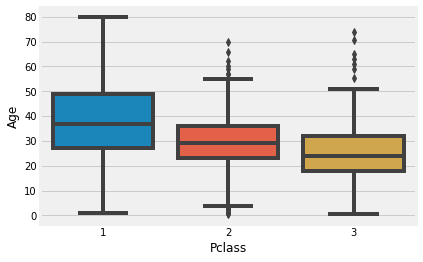

In [ ]:
sns.boxplot(x="Pclass", y="Age", data=train)

We can see that older population of passengers are more likely to be in Passenger Class 1 & Class 2 than Class 3.

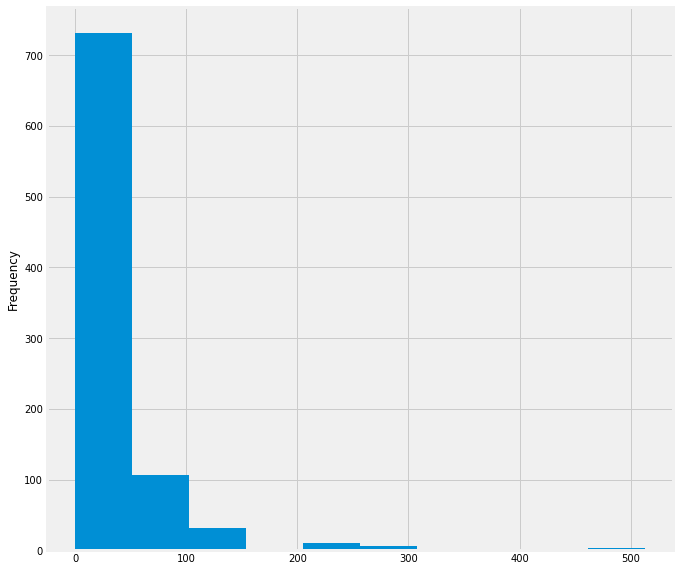

In [ ]:
train["Fare"].plot.hist(figsize=(10,10))

So we can see most of the passengers on Titanic are 3rd class passengers.

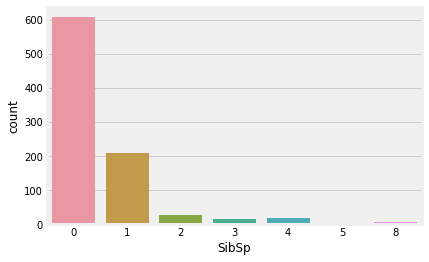

In [ ]:
sns.countplot(x="SibSp", data=train)

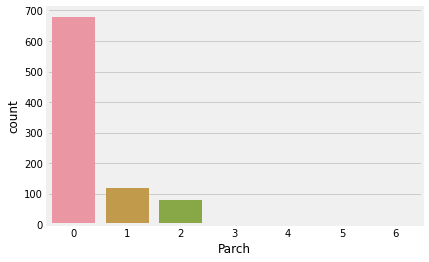

In [ ]:
sns.countplot(x="Parch", data=train)

Based on the 2 graphs above, we can conclude most of the passengers on titanic are single passengers and the 2nd most are most likely couples.


This sounds plausible because as we already saw above that most of the passengers on Titanic are 3rd class passengers and normally, when you are travelling with a family or a spouse, you definitely don't want to choose a 3rd class unless you have no choice.

Conclusion :

The columns that can be dropped are:
PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome.
Age, Fare: Instead, the respective range columns are retained.
The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described